## Normal Modes

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from nm4p.rk4 import rk4

In [76]:
# Eigenvalues of system - for analytic solution of problem.
K = np.array([[2, -1, 0],
            [-1, 2, -1],
            [0, -1, 2]])

eigval, eigvec = np.linalg.eig(K)
print(f'Eigenvalues are: \n{eigval}\n Eig-vecs are: \n{eigvec}')


Eigenvalues are: 
[3.41421356 2.         0.58578644]
 Eig-vecs are: 
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.05405432e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


## Numerical Simulation:

In [77]:
# derivative function used by RK4
def sprRK(s, t, param):
    '''Returns RHS of 3 mass-spring system EoM \n
    Inputs: \n
    s - state vector [x(1), x(2), ..., v(3)] \n 
    t - time (not used) \n 
    param - sping constant / block mass \n 
    Output: \n
    derivs - [dx(1)/dt, dx(2)/dt, ..., dv(3)/dt]'''
    derivs = np.empty(6)
    derivs[0] = s[3]
    derivs[1] = s[4]
    derivs[2] = s[5]
    
    derivs[3] = (2*s[0] - 1*s[1]) * -param
    derivs[4] = (-1*s[0] + 2*s[1] - 1*s[2]) * -param
    derivs[5] = (-1*s[1] + 2*s[2]) * -param
    
    return derivs

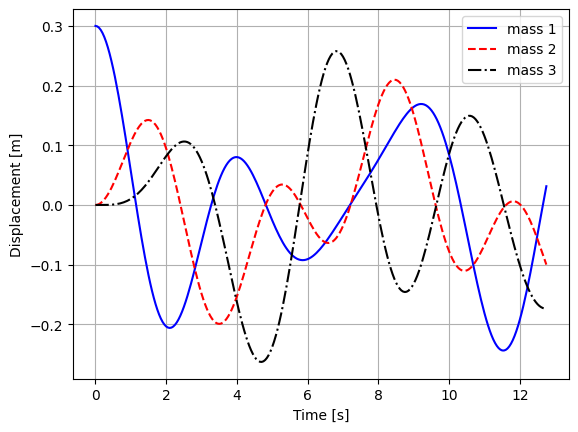

In [ ]:
# ICs and parameters
x1_0 = 0.3;     x2_0 = 0;       x3_0 = 0
v1_0 = 0;       v2_0 = 0;       v3_0 = 0
s = np.array([x1_0, x2_0, x3_0, v1_0, v2_0, v3_0])
k_over_m = 1
tau = 0.05
N = 256
count = 0
t = 0
tPlot = np.empty(N)
x1Plot = np.empty(N)
x2Plot = np.empty(N)
x3Plot = np.empty(N)

# Main loop
for i in range(N):
    x1Plot[i] = s[0]
    x2Plot[i] = s[1]
    x3Plot[i] = s[2]       # this is fine when you only have 3 variables to plot/record, if you had more then want x all in one array
    tPlot[i] = t

    s = rk4(s, t, tau, sprRK, k_over_m)
    count += 1
    t += tau


plt.plot(tPlot, x1Plot, 'b',label='mass 1')
plt.plot(tPlot, x2Plot, 'r--', label='mass 2')
plt.plot(tPlot, x3Plot, 'k-.',label='mass 3')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.show()

For random ICs, all three normal modes are excited and the time series appears chaotic. However the power spectrum shows the 3 eigenfrequencies:

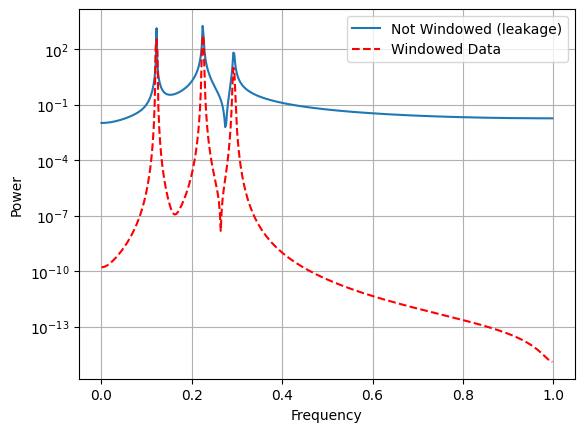

In [78]:
# ICs and parameters
x1_0 = 0.3;     x2_0 = 0;       x3_0 = 0
v1_0 = 0;       v2_0 = 0;       v3_0 = 0
s = np.array([x1_0, x2_0, x3_0, v1_0, v2_0, v3_0])
k_over_m = 1
tau = 0.5
N = 1000
count = 0
t = 0
tPlot = np.empty(N)
x1Plot = np.empty(N)
x2Plot = np.empty(N)
x3Plot = np.empty(N)

# Main loop
for i in range(N):
    x1Plot[i] = s[0]
    x2Plot[i] = s[1]
    x3Plot[i] = s[2]       # this is fine when you only have 3 variables to plot/record, if you had more then want x all in one array
    tPlot[i] = t

    s = rk4(s, t, tau, sprRK, k_over_m)
    count += 1
    t += tau

# Power spectrum of mass 1
f = np.arange(N) / (N*tau)
x1fft = np.fft.fft(x1Plot)
P_S = np.empty(len(x1fft))
for i in range(len(x1fft)):
    P_S[i] = np.abs(x1fft[i])**2

# Hamming Window
x1Ham = np.empty(N)
for j in range(N):
    x1Ham[j] = (0.5 - 0.5*np.cos(2*np.pi*j/N)) * x1Plot[j]
x1fft_H = np.fft.fft(x1Ham)
P_S_H = np.empty(len(x1fft_H))
for i in range(len(x1fft_H)):
    P_S_H[i] = np.abs(x1fft_H[i])**2

plt.semilogy(f[0:int(N/2)], P_S[0:int(N/2)], label='Not Windowed (leakage)')
plt.semilogy(f[0:int(N/2)], P_S_H[0:int(N/2)], 'r--', label='Windowed Data')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.legend()
plt.show()